In [1]:
# importing necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve,auc

In [2]:
#Load the excel data into pandas dataframe df_facies
df=pd.read_csv("Survey_AI.csv")
df.head()

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7


##### For column 2

In [3]:
df['Q2.AI_sources'] = df['Q2.AI_sources'].apply(lambda x: x.split(';') if isinstance(x, str) else x)
print(df['Q2.AI_sources'] )

0     [Internet, Books/Scientific papers (physical/o...
1                              [Internet, Social media]
2     [Internet, Books/Scientific papers (physical/o...
3                              [Internet, Social media]
4                                            [Internet]
                            ...                        
86                                           [Internet]
87                                       [Social media]
88    [Books/Scientific papers (physical/online form...
89                     [I don't inform myself about AI]
90                    [Discussions with family/friends]
Name: Q2.AI_sources, Length: 91, dtype: object


In [4]:
mlb = MultiLabelBinarizer()
df_sources = pd.DataFrame(mlb.fit_transform(df['Q2.AI_sources']), columns=mlb.classes_, index=df.index)
print(df_sources.columns)

Index(['Books/Scientific papers (physical/online format)',
       'Discussions with family/friends', 'I don't inform myself about AI',
       'Internet', 'Social media'],
      dtype='object')


In [5]:
df = df.drop('Q2.AI_sources', axis=1)

##### For Column6

In [6]:
df['Q6.Domains'] = df['Q6.Domains'].apply(lambda x: x.split(';') if isinstance(x, str) else x)
print(df['Q6.Domains'] )

0                      [Education, Medicine, Marketing]
1                [Medicine, Agriculture, Constructions]
2         [Education, Marketing, Public Administration]
3                                 [Education, Medicine]
4     [Education, Medicine, Agriculture, Constructions]
                            ...                        
86                                [Education, Medicine]
87                                [Education, Medicine]
88    [Education, Medicine, Agriculture, Constructio...
89                                           [Medicine]
90     [Medicine, Constructions, Public Administration]
Name: Q6.Domains, Length: 91, dtype: object


In [7]:
df_sources = pd.DataFrame(mlb.fit_transform(df['Q6.Domains']), columns=mlb.classes_, index=df.index)
print(df_sources.columns)

Index(['Agriculture', 'Art', 'Construction', 'Constructions', 'Education',
       'Marketing', 'Medicine', 'Public Administration'],
      dtype='object')


In [8]:
df = df.drop('Q6.Domains', axis=1)

In [9]:
#ONE HOT ENCODING :We can do that using the pandas get_dummies function on the whole dataframe
df=pd.get_dummies(df,columns=['Q1.AI_knowledge','Q3#1.AI_dehumanization','Q3#2.Job_replacement','Q3#3.Problem_solving', 'Q3#4.AI_rulling_society', 'Q4#1.AI_costly',
       'Q4#2.Economic_crisis', 'Q4#3.Economic_growth', 'Q4#4.Job_loss',
       'Q5.Feelings','Q8.Advantage_teaching',
       'Q9.Advantage_learning', 'Q10.Advantage_evaluation ',
       'Q11.Disadvantage_educational_process', 'Q12.Gender',
       'Q13.Year_of_study', 'Q14.Major'])

In [10]:
df=df.drop("ID",axis=1)

In [11]:
df.head()

,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q6#1.Education,Q6#2.Medicine,Q6#3.Agriculture,Q6#4.Constructions,Q6#5.Marketing,...,Q11.Disadvantage_educational_process_2,Q11.Disadvantage_educational_process_3,Q11.Disadvantage_educational_process_4,Q12.Gender_1,Q12.Gender_2,Q13.Year_of_study_1,Q13.Year_of_study_2,Q14.Major_1,Q14.Major_2,Q14.Major_3
0,1,1,0,0,0,1,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,1,0,1,0,0,0,1,1,1,0,...,1,0,0,0,1,0,1,0,1,0
2,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
3,1,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,1,0,0,0,0,1,1,1,1,0,...,0,0,1,1,0,0,1,0,1,0


In [12]:
df.isna().any().any()# Missing values

False

In [13]:
#Check if there are any duplicated values in the dataset
df[df.duplicated()]

,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q6#1.Education,Q6#2.Medicine,Q6#3.Agriculture,Q6#4.Constructions,Q6#5.Marketing,...,Q11.Disadvantage_educational_process_2,Q11.Disadvantage_educational_process_3,Q11.Disadvantage_educational_process_4,Q12.Gender_1,Q12.Gender_2,Q13.Year_of_study_1,Q13.Year_of_study_2,Q14.Major_1,Q14.Major_2,Q14.Major_3


In [14]:
#Gives information about the datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 88 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Q2#1.Internet                           91 non-null     int64  
 1   Q2#2.Books/Papers                       91 non-null     int64  
 2   Q2#3.Social_media                       91 non-null     int64  
 3   Q2#4.Discussions                        91 non-null     int64  
 4   Q2#5.NotInformed                        91 non-null     int64  
 5   Q6#1.Education                          91 non-null     int64  
 6   Q6#2.Medicine                           91 non-null     int64  
 7   Q6#3.Agriculture                        91 non-null     int64  
 8   Q6#4.Constructions                      91 non-null     int64  
 9   Q6#5.Marketing                          91 non-null     int64  
 10  Q6#6.Administration                     91 non-null     int64  


In [15]:
#sns.pairplot(df)

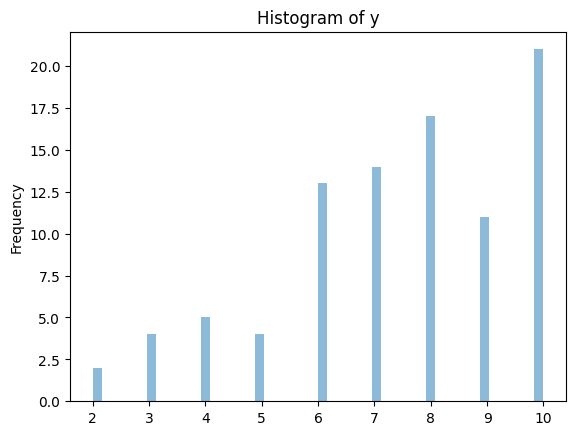

In [16]:
df['Q7.Utility_grade'].plot.hist(alpha=0.5, bins=50)
plt.title('Histogram of y')
plt.show()

In [17]:
# fig, ax = plt.subplots(figsize=(15,15))  
# sns.heatmap(df.corr(),annot=True)

In [18]:
df.corr()

,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q6#1.Education,Q6#2.Medicine,Q6#3.Agriculture,Q6#4.Constructions,Q6#5.Marketing,...,Q11.Disadvantage_educational_process_2,Q11.Disadvantage_educational_process_3,Q11.Disadvantage_educational_process_4,Q12.Gender_1,Q12.Gender_2,Q13.Year_of_study_1,Q13.Year_of_study_2,Q14.Major_1,Q14.Major_2,Q14.Major_3
Q2#1.Internet,1.000000,-0.001298,0.140452,0.096446,-0.554316,0.143678,0.045112,0.146247,0.075970,-0.048978,...,-0.033046,0.149000,-0.102036,0.237487,-0.237487,-0.212628,0.212628,-0.143678,0.062825,0.084125
Q2#2.Books/Papers,-0.001298,1.000000,0.043311,0.096504,-0.195666,0.075856,0.019047,0.130001,0.019315,0.258291,...,0.029270,-0.057612,-0.038006,0.108581,-0.108581,0.002091,-0.002091,0.119972,-0.063590,-0.057612
Q2#3.Social_media,0.140452,0.043311,1.000000,0.282793,-0.235294,0.008798,0.161858,0.078834,0.134475,-0.161438,...,0.123125,0.198185,-0.240381,-0.043311,0.043311,0.139815,-0.139815,-0.055896,0.058215,-0.005598
Q2#4.Discussions,0.096446,0.096504,0.282793,1.000000,-0.131929,-0.003869,0.038813,0.104897,0.116984,-0.030267,...,-0.046781,0.155557,-0.086268,0.134598,-0.134598,0.015666,-0.015666,-0.113498,-0.028892,0.155557
Q2#5.NotInformed,-0.554316,-0.195666,-0.235294,-0.131929,1.000000,-0.096266,-0.090396,-0.002920,-0.204402,0.168017,...,-0.058526,-0.154517,0.189816,-0.175284,0.175284,0.069404,-0.069404,0.190461,-0.045388,-0.154517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q13.Year_of_study_1,-0.212628,0.002091,0.139815,0.015666,0.069404,0.010089,0.098384,0.082380,0.151514,0.031672,...,0.104798,0.021252,-0.126107,-0.144811,0.144811,1.000000,-1.000000,0.569767,-0.561845,0.021252
Q13.Year_of_study_2,0.212628,-0.002091,-0.139815,-0.015666,-0.069404,-0.010089,-0.098384,-0.082380,-0.151514,-0.031672,...,-0.104798,-0.021252,0.126107,0.144811,-0.144811,-1.000000,1.000000,-0.569767,0.561845,-0.021252
Q14.Major_1,-0.143678,0.119972,-0.055896,-0.113498,0.190461,-0.005464,0.113498,0.085804,0.118231,0.054501,...,0.057712,-0.138907,-0.171664,0.026899,-0.026899,0.569767,-0.569767,1.000000,-0.593813,-0.407854
Q14.Major_2,0.062825,-0.063590,0.058215,-0.028892,-0.045388,-0.069799,-0.250803,-0.009305,-0.173727,-0.036162,...,0.049456,0.020284,0.129968,-0.029744,0.029744,-0.561845,0.561845,-0.593813,1.000000,-0.492451


In [19]:
# Calculate the correlation coefficients between the target variable and all other predictor variables
corr = df.corr()['Q7.Utility_grade']
corr

Q2#1.Internet          0.202956
Q2#2.Books/Papers      0.170611
Q2#3.Social_media      0.107308
Q2#4.Discussions       0.001128
Q2#5.NotInformed      -0.239745
                         ...   
Q13.Year_of_study_1   -0.105102
Q13.Year_of_study_2    0.105102
Q14.Major_1           -0.067286
Q14.Major_2           -0.007291
Q14.Major_3            0.081057
Name: Q7.Utility_grade, Length: 88, dtype: float64

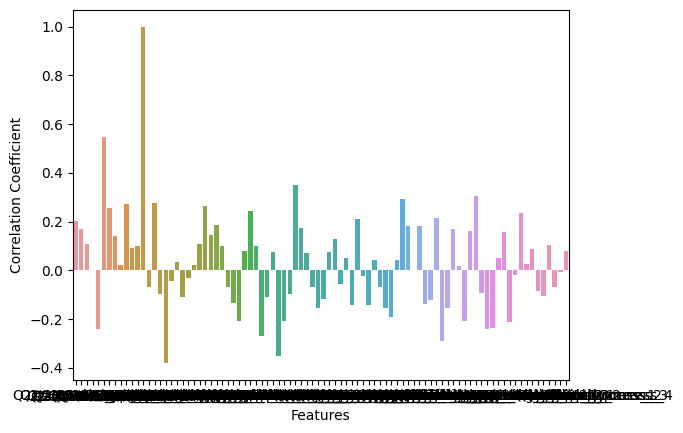

In [20]:
# Plot a bar chart or a heatmap of the correlation coefficients
sns.barplot(x=corr.index, y=corr.values)
# Add a y-axis label
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

<AxesSubplot:>

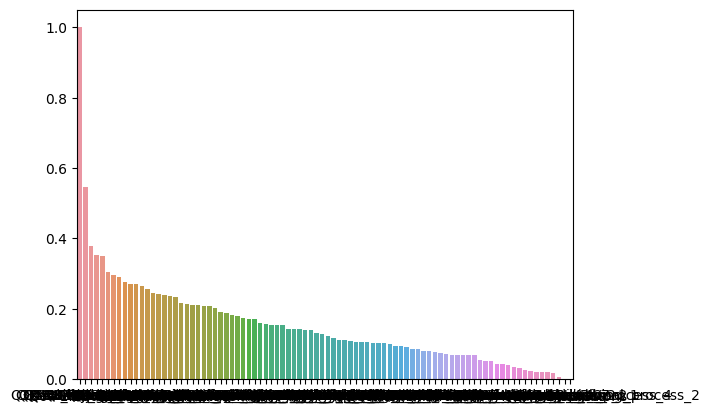

In [21]:
# Sort the predictor variables by their correlation coefficients
corr_sorted = corr.abs().sort_values(ascending=False)

# Highlight the target variable in the plot
sns.barplot(x=corr_sorted.index, y=abs(corr_sorted.values))

In [22]:
feat_sel=corr_sorted[1:10]
print(feat_sel)

Q6#1.Education             0.545814
Q1.AI_knowledge_2          0.379371
Q3#3.Problem_solving_2     0.352369
Q3#3.Problem_solving_5     0.349193
Q9.Advantage_learning_1    0.303660
Q4#3.Economic_growth_5     0.295027
Q5.Feelings_2              0.291249
Q16.GPA                    0.276962
Q3#2.Job_replacement_4     0.271233
Name: Q7.Utility_grade, dtype: float64


In [23]:
feat_sel_col=feat_sel.index

In [24]:
df_new=df.loc[:,feat_sel_col]
df['UpdatedY']=df['Q7.Utility_grade']
df_new=pd.concat([df_new,df['UpdatedY']],axis=1)

In [25]:
df_new.head()

,Q6#1.Education,Q1.AI_knowledge_2,Q3#3.Problem_solving_2,Q3#3.Problem_solving_5,Q9.Advantage_learning_1,Q4#3.Economic_growth_5,Q5.Feelings_2,Q16.GPA,Q3#2.Job_replacement_4,UpdatedY
0,1,0,0,1,1,0,0,9.2,0,9
1,0,0,0,0,0,0,0,7.7,0,6
2,1,0,0,0,0,0,0,7.2,0,6
3,1,0,0,1,0,0,0,8.2,1,9
4,1,0,0,1,0,0,0,7.7,0,8


In [118]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Q6#1.Education           91 non-null     int64  
 1   Q1.AI_knowledge_2        91 non-null     uint8  
 2   Q3#3.Problem_solving_2   91 non-null     uint8  
 3   Q3#3.Problem_solving_5   91 non-null     uint8  
 4   Q9.Advantage_learning_1  91 non-null     uint8  
 5   Q4#3.Economic_growth_5   91 non-null     uint8  
 6   Q5.Feelings_2            91 non-null     uint8  
 7   Q16.GPA                  91 non-null     float64
 8   Q3#2.Job_replacement_4   91 non-null     uint8  
 9   UpdatedY                 91 non-null     int64  
dtypes: float64(1), int64(2), uint8(7)
memory usage: 2.9 KB


In [26]:
df_new.describe(include='all')

,Q6#1.Education,Q1.AI_knowledge_2,Q3#3.Problem_solving_2,Q3#3.Problem_solving_5,Q9.Advantage_learning_1,Q4#3.Economic_growth_5,Q5.Feelings_2,Q16.GPA,Q3#2.Job_replacement_4,UpdatedY
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.670330,0.021978,0.087912,0.472527,0.296703,0.175824,0.131868,7.798901,0.362637,7.439560
std,0.472698,0.147424,0.284736,0.502011,0.459335,0.382780,0.340222,0.975306,0.483425,2.161321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.200000,0.000000,6.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.700000,0.000000,8.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,8.700000,1.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.700000,1.000000,10.000000


In [27]:
df_new.shape

(91, 10)

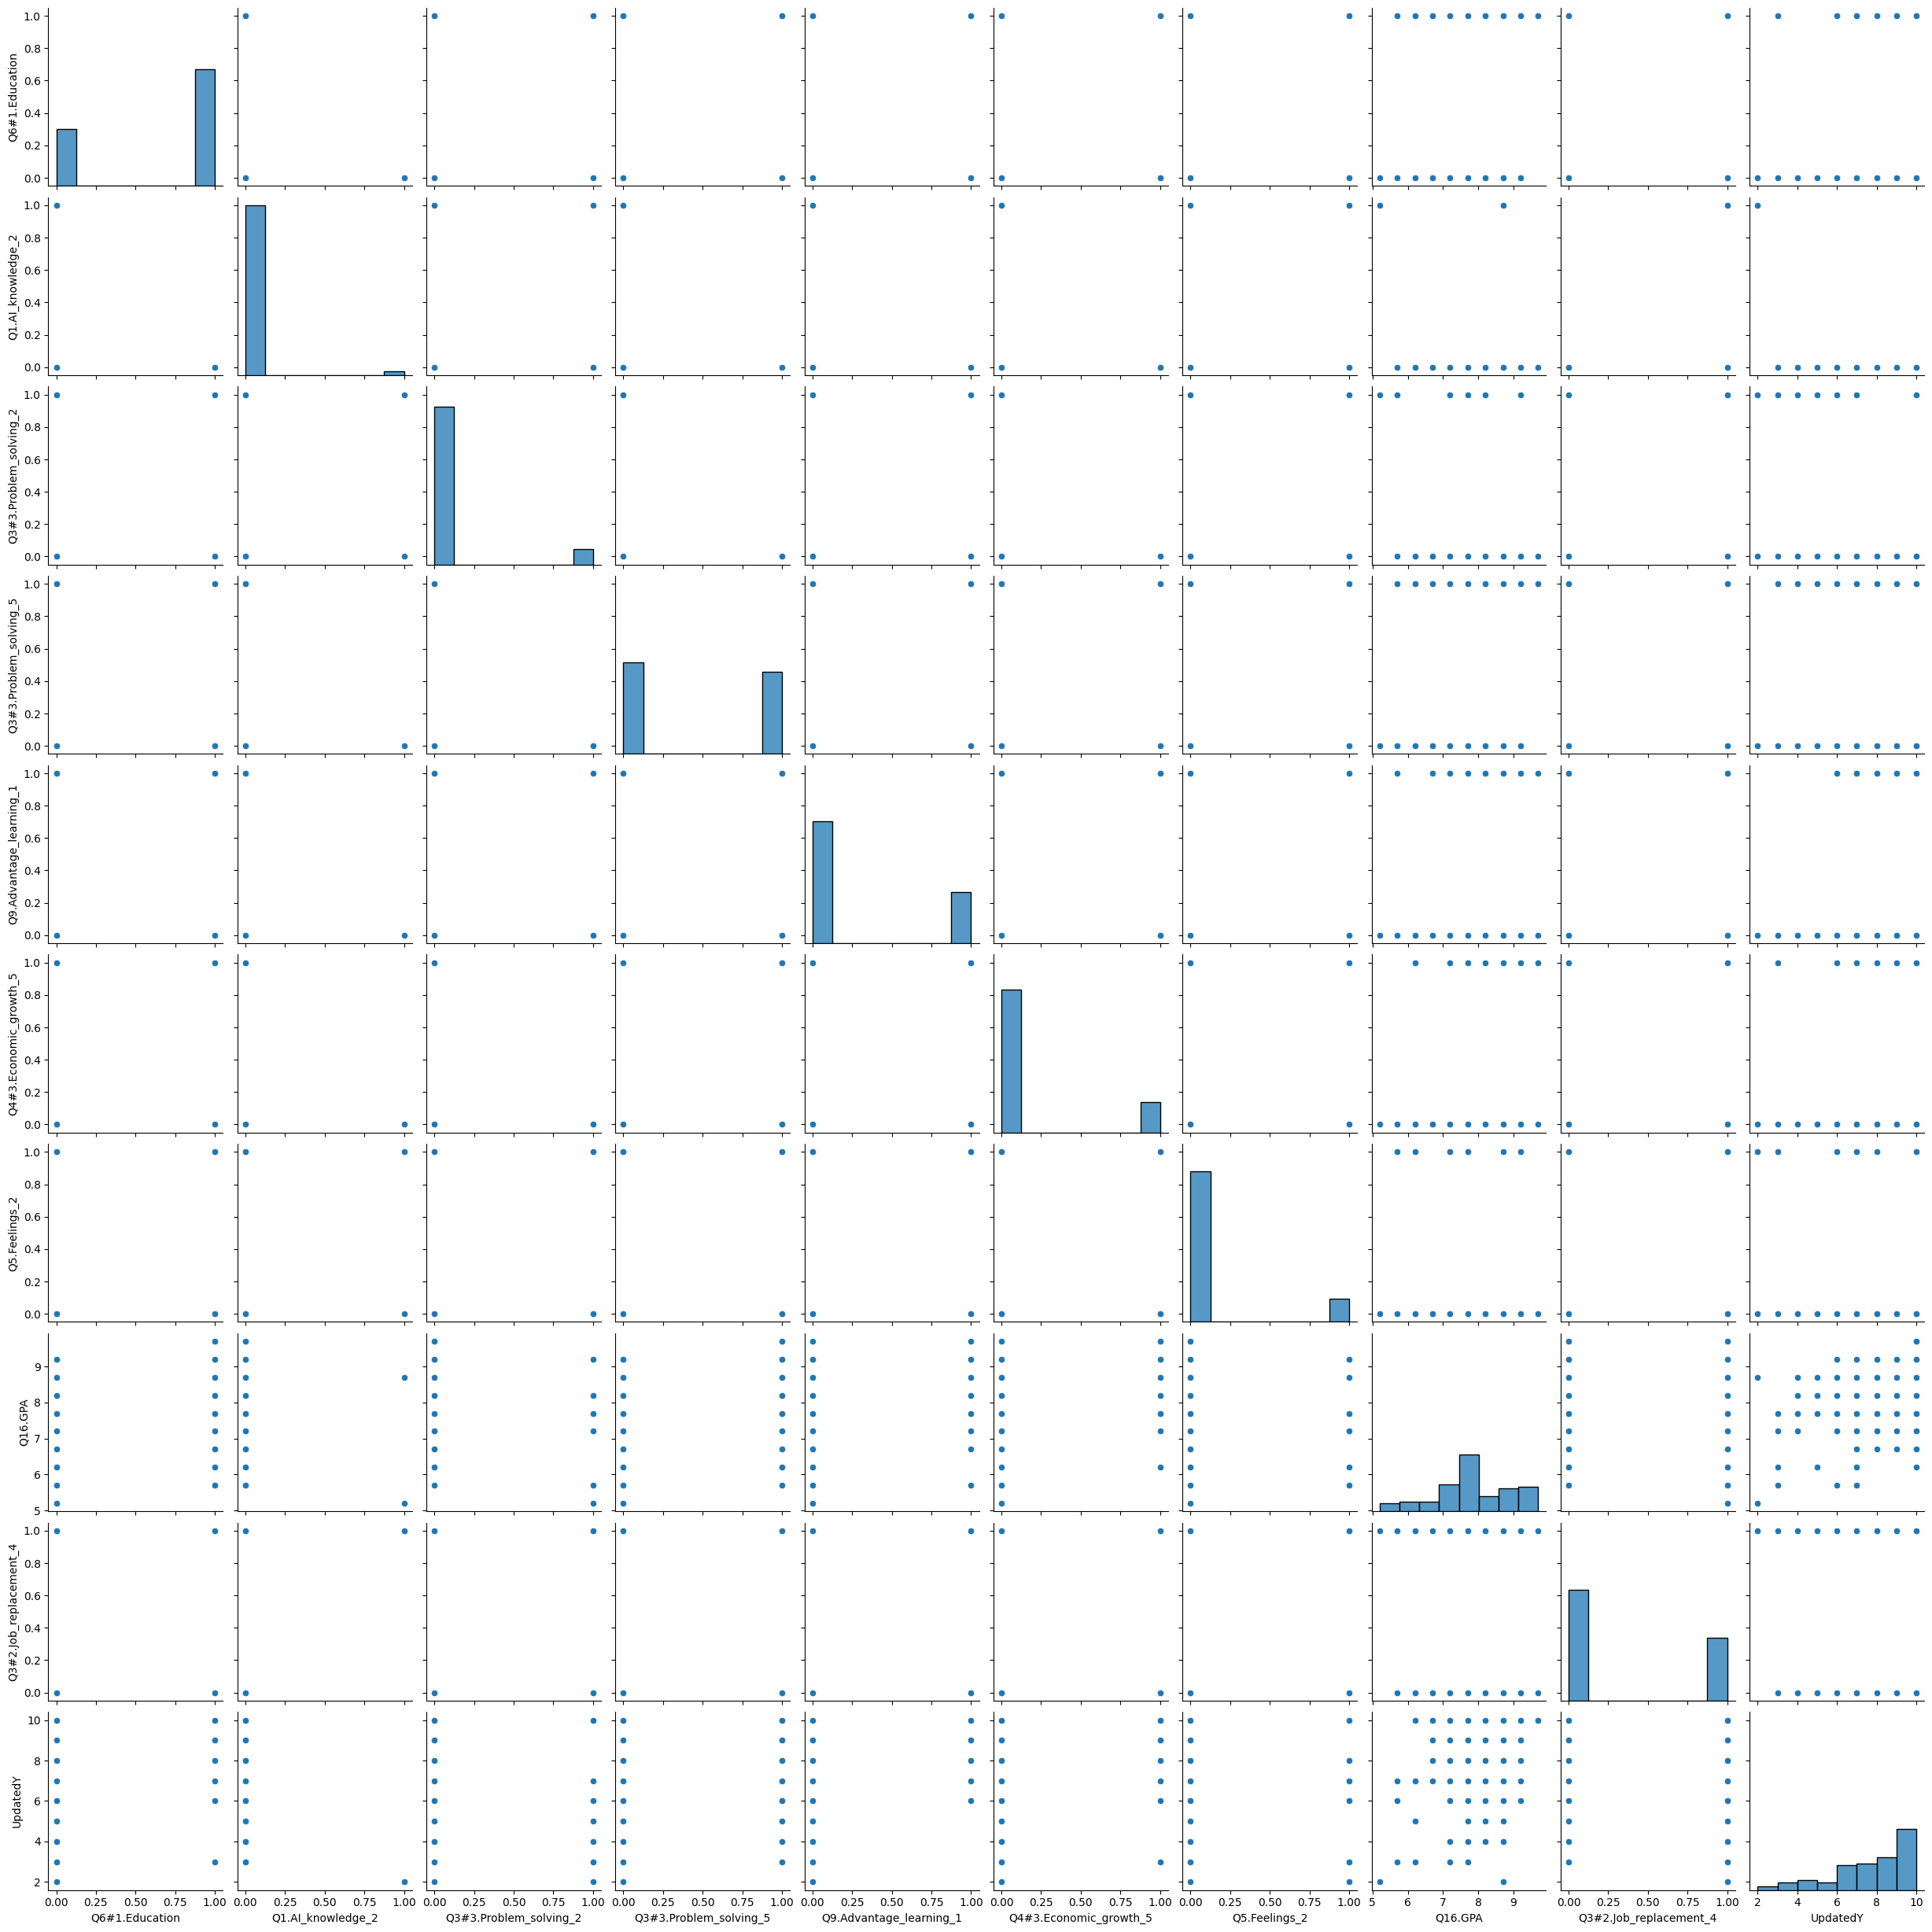

In [28]:
sns.pairplot(df_new)

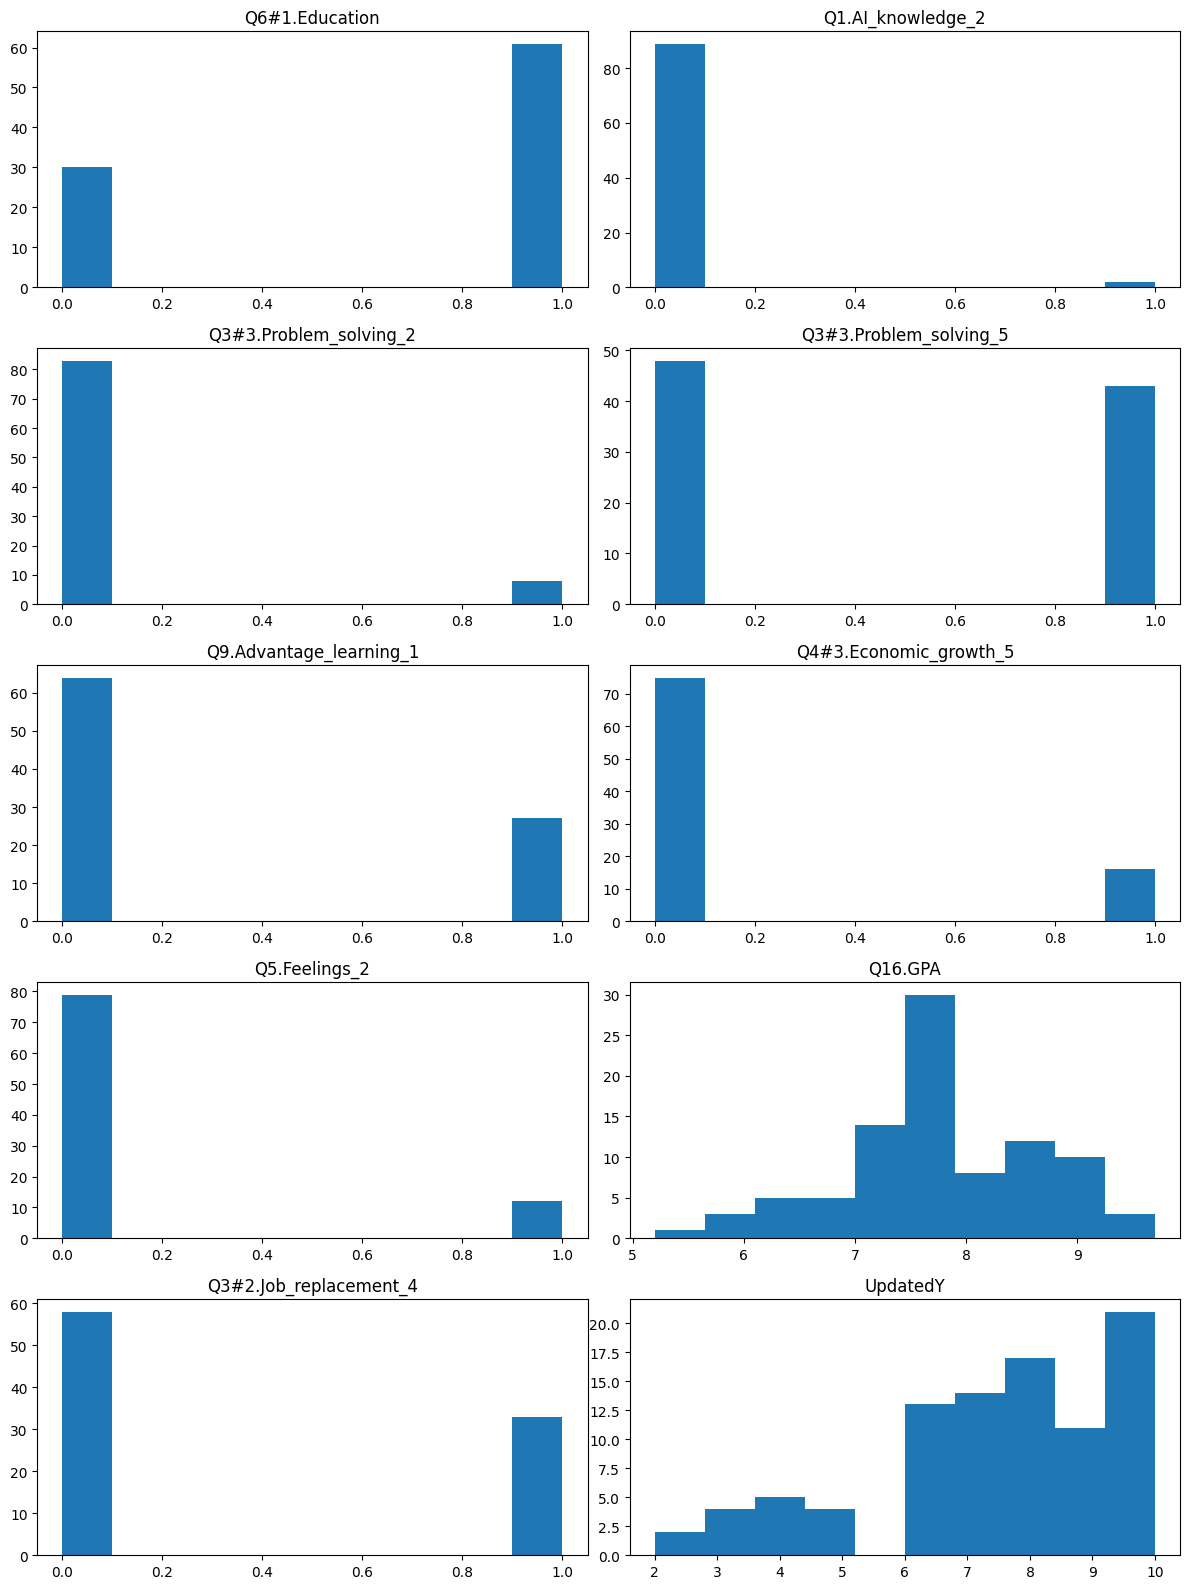

In [136]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))
axs = axs.ravel()
for i, col in enumerate(df_new.columns):
    axs[i].hist(df_new[col], bins=10)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

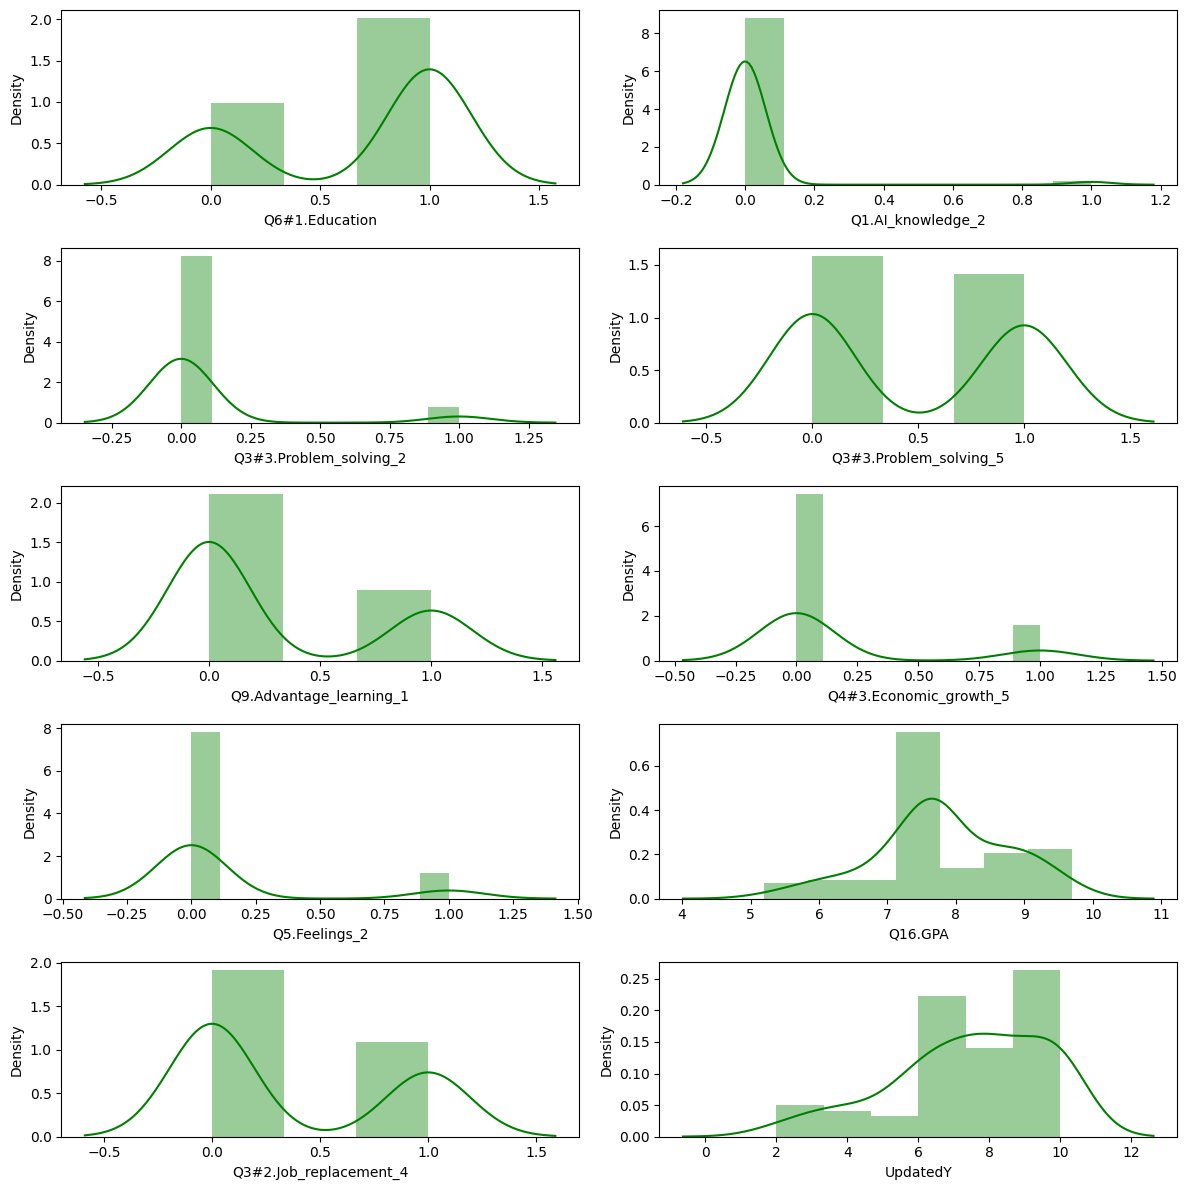

In [29]:
#Plotting distributions of each columns
fig, axes = plt.subplots(5, 2, figsize=(12, 12))
columns=df_new.columns
i=0
j=0
for col in columns[:]:
    sns.distplot(df_new[col] , color="green", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

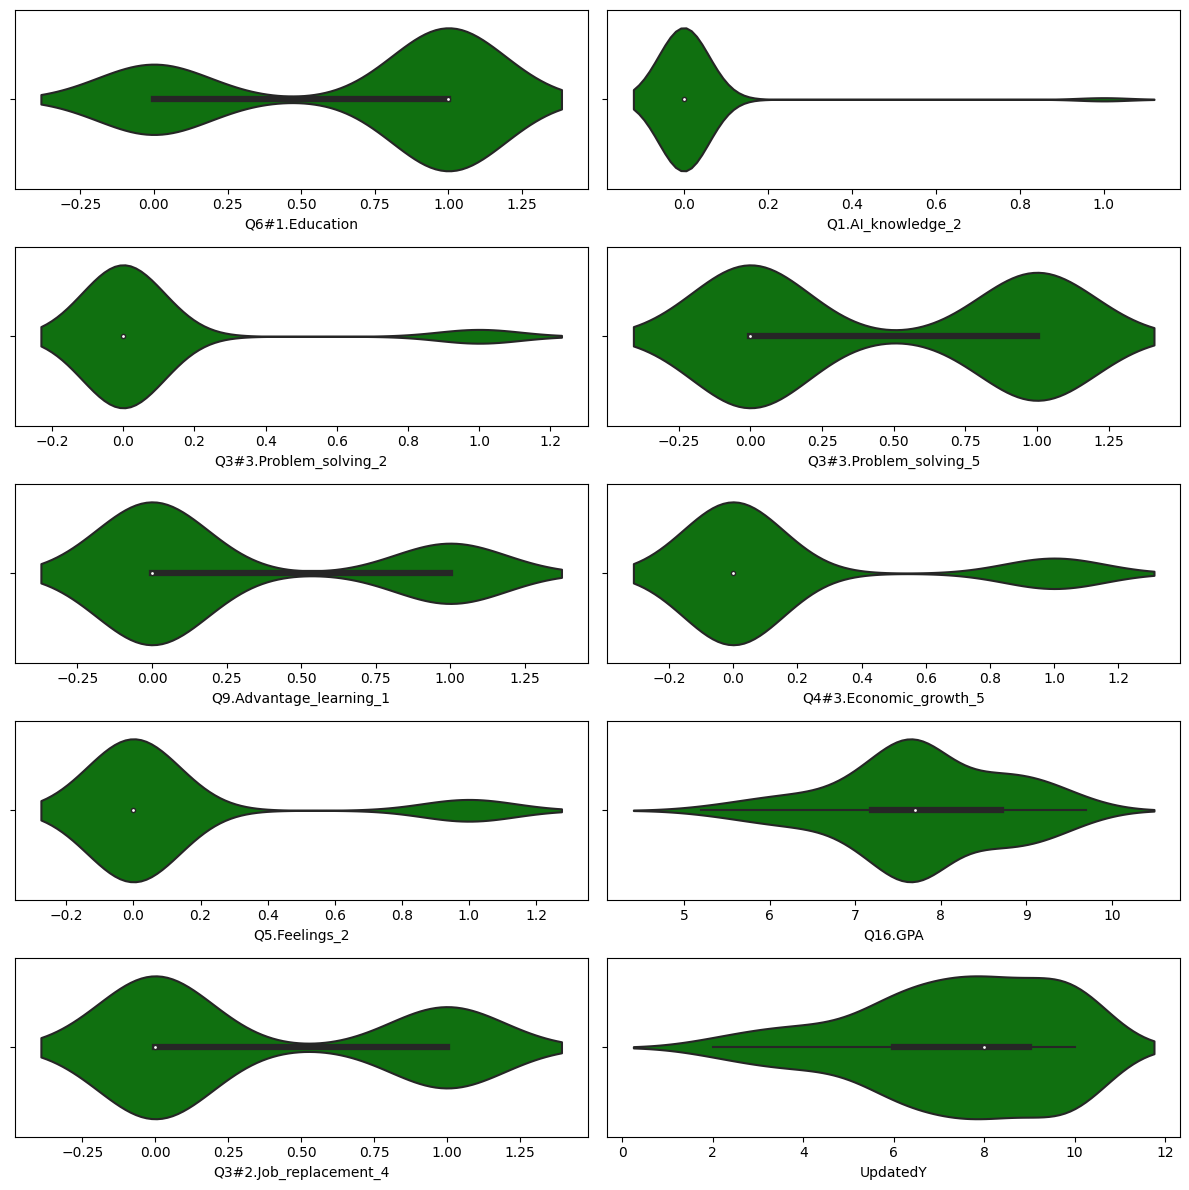

In [30]:
#Plotting distributions of each columns
fig, axes = plt.subplots(5, 2, figsize=(12, 12))
columns=df_new.columns
i=0
j=0
for col in columns[:]:
    sns.violinplot(df_new[col] , color="green", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

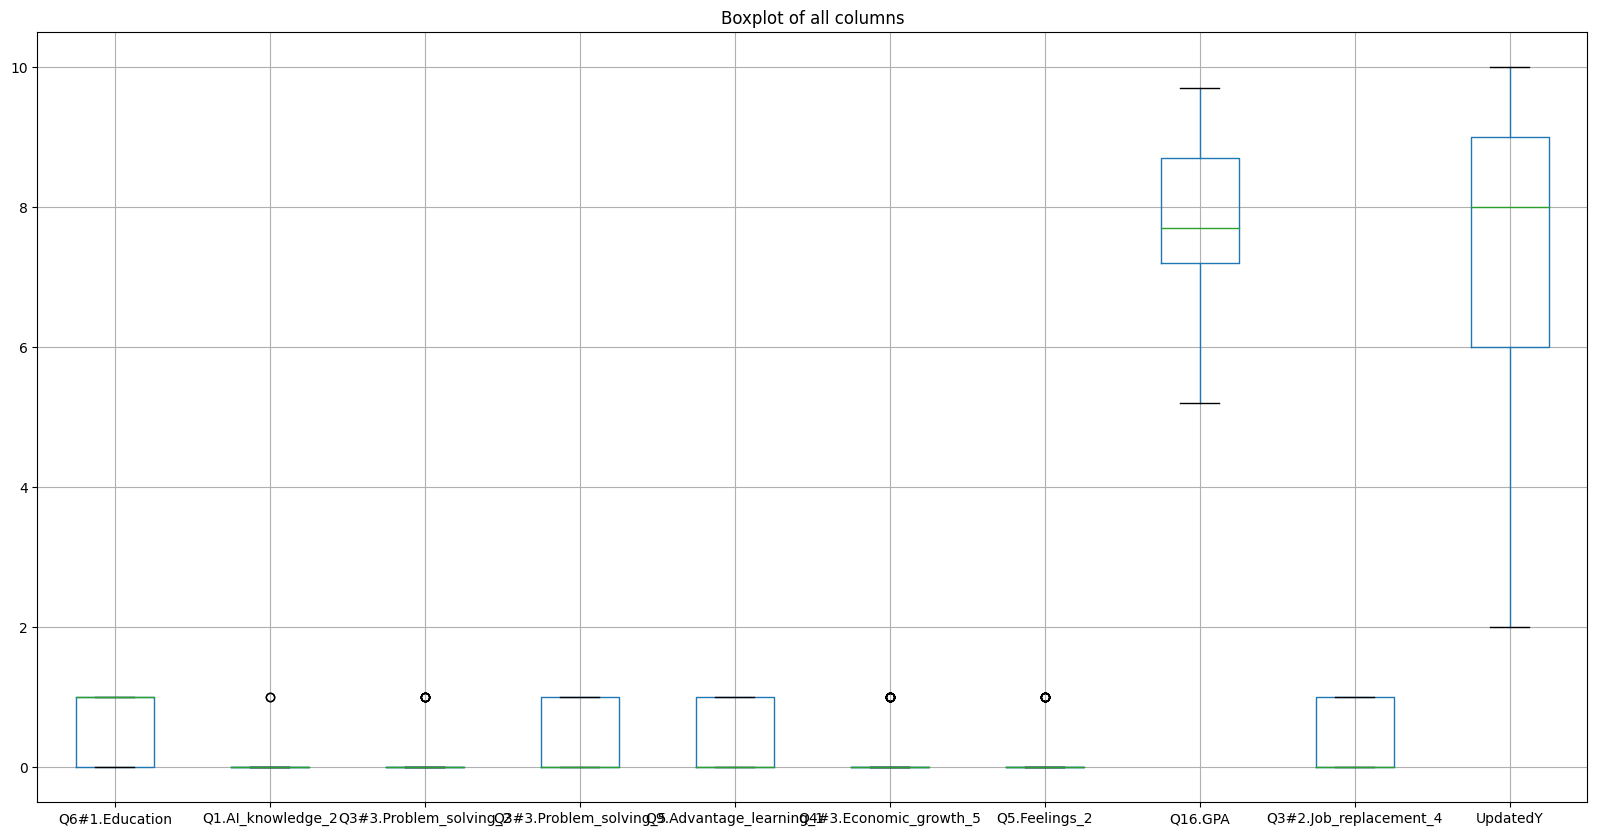

In [31]:
# Plot the boxplot for all columns in the DataFrame to find the outliers
plt.figure(figsize=(20, 10))
df_new.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

In [32]:
X_1=df.loc[:,feat_sel_col] # Considering only top 10 features

In [33]:
X = df.drop('Q7.Utility_grade', axis=1)# Including all features

In [34]:
#df.to_csv('processed_data1.csv', index=False)

In [86]:
models = {'LogReg' : LogisticRegression(penalty= 'l2', class_weight= 'balanced'),
                'DTree' : DecisionTreeClassifier(max_depth= 19, max_features= 'auto',min_samples_leaf= 2, min_samples_split= 2),
               'RF' : RandomForestClassifier(n_estimators= 46, min_samples_split= 2, min_samples_leaf= 2, max_features='sqrt', max_depth= 18),
               'SVM-Linear':SVC(kernel= 'linear', C= 0.01),
               'SVM-Non-Linear':SVC(kernel= 'poly', gamma= 0.1, degree= 2, C= 5.0)
              }


In [87]:
df['y_new'] = df['Q7.Utility_grade'].apply(lambda x: 1 if x > 5 else 0)

In [88]:
df

,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q6#1.Education,Q6#2.Medicine,Q6#3.Agriculture,Q6#4.Constructions,Q6#5.Marketing,...,Q11.Disadvantage_educational_process_4,Q12.Gender_1,Q12.Gender_2,Q13.Year_of_study_1,Q13.Year_of_study_2,Q14.Major_1,Q14.Major_2,Q14.Major_3,UpdatedY,y_new
0,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,9,1
1,1,0,1,0,0,0,1,1,1,0,...,0,0,1,0,1,0,1,0,6,1
2,1,1,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,6,1
3,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,9,1
4,1,0,0,0,0,1,1,1,1,0,...,1,1,0,0,1,0,1,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,1,0,0,7,1
87,0,0,1,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,1,7,1
88,0,1,0,0,0,1,1,1,1,1,...,0,0,1,1,0,1,0,0,10,1
89,0,0,0,0,1,0,1,0,0,0,...,0,0,1,1,0,1,0,0,2,0


In [89]:
df['y_new'] = df['y_new'].astype('category')

In [90]:
y = df['y_new']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [92]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_1, y, test_size=0.2, stratify=y,random_state=42)

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='fail'>

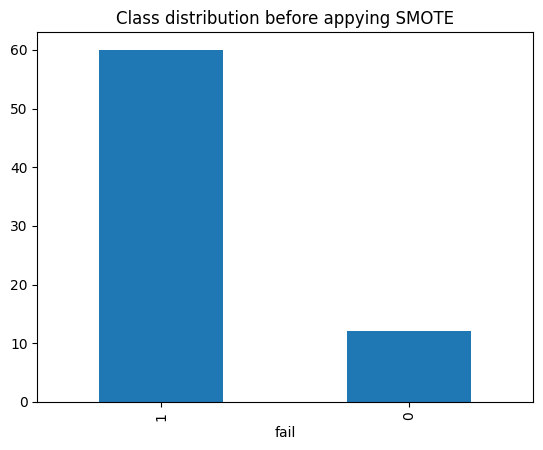

In [93]:
pd.Series(y_trainf).value_counts().plot(kind='bar', title='Class distribution before appying SMOTE', xlabel='fail')

In [94]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# X is your feature matrix and y is your target variable
#X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, stratify=y)

# Apply SMOTE to the training set
sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_trainf, y_trainf= sm.fit_resample(X_trainf, y_trainf)

# Now you can use X_train_resampled and y_train_resampled to train your model
# and X_test and y_test to evaluate it

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='failure'>

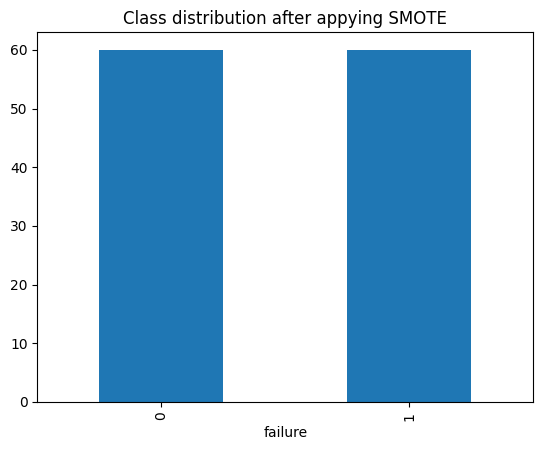

In [95]:
pd.Series(y_trainf).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='failure')


In [96]:
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_trainf)

# transform the dataset using the fitted scaler
X_trainf = scaler.transform(X_trainf)
X_testf = scaler.transform(X_testf)

LogReg: Accuracy=0.842, Precision=0.865, Recall=0.842, F1-Score=0.851
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.93      0.88      0.90        16

    accuracy                           0.84        19
   macro avg       0.72      0.77      0.74        19
weighted avg       0.86      0.84      0.85        19



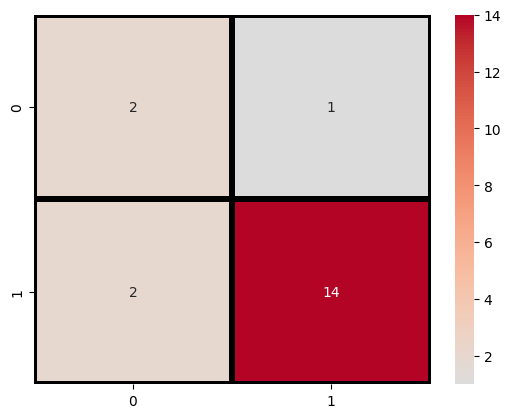

DTree: Accuracy=0.842, Precision=0.865, Recall=0.842, F1-Score=0.851
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.93      0.88      0.90        16

    accuracy                           0.84        19
   macro avg       0.72      0.77      0.74        19
weighted avg       0.86      0.84      0.85        19



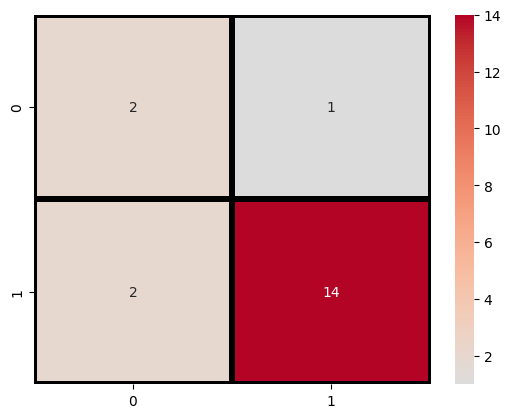

RF: Accuracy=0.842, Precision=0.865, Recall=0.842, F1-Score=0.851
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.93      0.88      0.90        16

    accuracy                           0.84        19
   macro avg       0.72      0.77      0.74        19
weighted avg       0.86      0.84      0.85        19



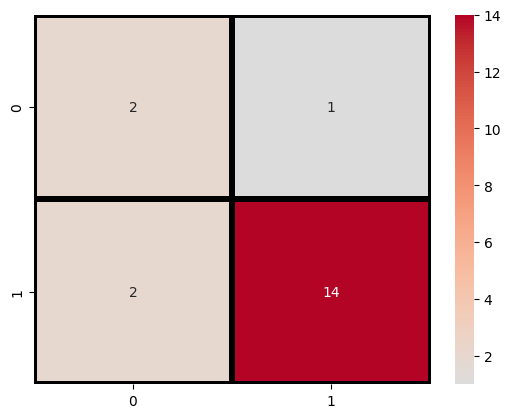

SVM-Linear: Accuracy=0.842, Precision=0.865, Recall=0.842, F1-Score=0.851
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.93      0.88      0.90        16

    accuracy                           0.84        19
   macro avg       0.72      0.77      0.74        19
weighted avg       0.86      0.84      0.85        19



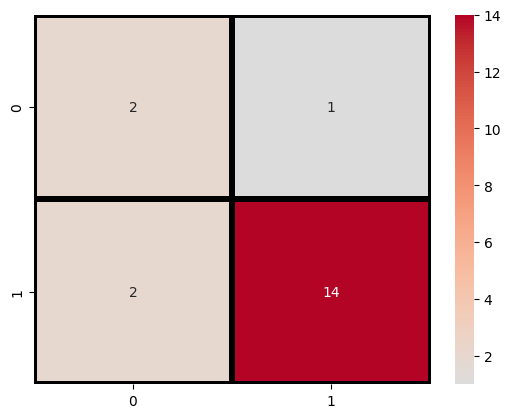

SVM-Non-Linear: Accuracy=0.842, Precision=0.865, Recall=0.842, F1-Score=0.851
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.93      0.88      0.90        16

    accuracy                           0.84        19
   macro avg       0.72      0.77      0.74        19
weighted avg       0.86      0.84      0.85        19



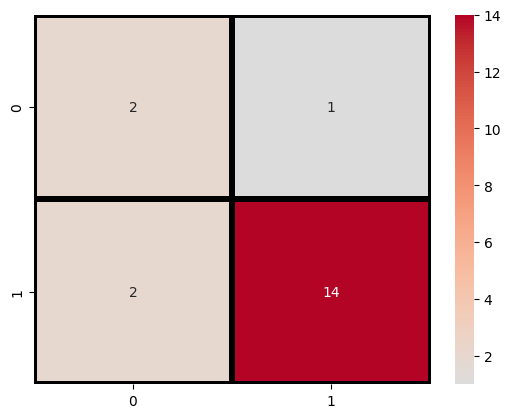

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for name, model in models.items():
    model.fit(X_trainf, y_trainf)
    y_pred = model.predict(X_testf)
    acc = accuracy_score(y_testf, y_pred)
    prec = precision_score(y_testf, y_pred, average='weighted')
    rec = recall_score(y_testf, y_pred, average='weighted')
    f1 = f1_score(y_testf, y_pred, average='weighted')
    print(f'{name}: Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}, F1-Score={f1:.3f}')
    cm=confusion_matrix(y_testf, y_pred)
    sns.heatmap(cm, center=True, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
    print(classification_report(y_testf, y_pred))
    plt.show()

Logistic Regression
Best params: {'C': 10, 'penalty': 'l2'}
Testing accuracy: 0.79

Support Vector Machine
Best params: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Testing accuracy: 0.84

Random Forest
Best params: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 10}
Testing accuracy: 0.79

Decision Tree
Best params: {'max_depth': 1, 'min_samples_leaf': 7}
Testing accuracy: 0.74



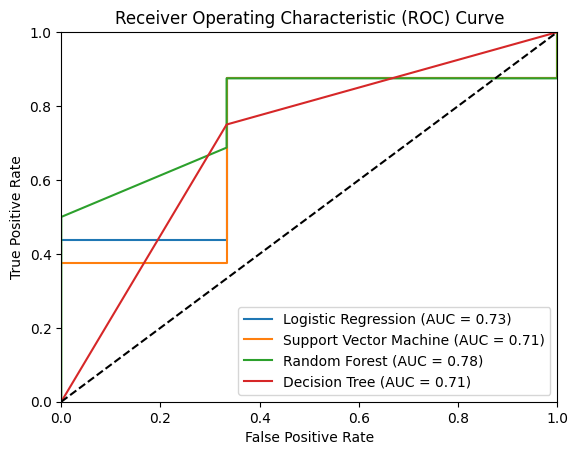

In [98]:
#Train the classifiers
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(probability= True)
rf = RandomForestClassifier()

# Define a range of hyperparameters for each model
logistic_params = {
    'penalty': ['l1', 'l2'],'C': [ 1,10] }

decision_tree_params = {
    'max_depth': [1,2,5],'min_samples_leaf': [7,8,9]}

random_forest_params = {
    'n_estimators': [10,75,100,150],'max_depth': [2,3, 5],'min_samples_split': [1,2, 5]}

svc_params = {
    'kernel': ['linear', 'rbf'],'C':[0.001,0.01,0.1, 1] ,'gamma': [ 1, 10]}

classifiers = {'Logistic Regression': (lr, logistic_params),
               'Support Vector Machine': (svm, svc_params),
               'Random Forest': (rf, random_forest_params),
               'Decision Tree': (dt, decision_tree_params)}
test_accuracies = {}

for name, (clf, params) in classifiers.items():
    gs = GridSearchCV(clf, param_grid=params, cv=5)
    gs.fit(X_trainf, y_trainf)
    print(name)
    print(f'Best params: {gs.best_params_}')
    print(f'Testing accuracy: {gs.score(X_testf, y_testf):.2f}\n')
    test_accuracy = gs.score(X_testf, y_testf)
    test_accuracies[name] = test_accuracy
    # predict probabilities for the test set
    probas_ = gs.predict_proba(X_testf)
    fpr, tpr, thresholds = roc_curve(y_testf, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
        
    # plot ROC curve for the model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()
    


In [99]:
for name, (clf, params) in classifiers.items():
    print(test_accuracies[name])
    print(params)

0.7894736842105263
{'penalty': ['l1', 'l2'], 'C': [1, 10]}
0.8421052631578947
{'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1], 'gamma': [1, 10]}
0.7894736842105263
{'n_estimators': [10, 75, 100, 150], 'max_depth': [2, 3, 5], 'min_samples_split': [1, 2, 5]}
0.7368421052631579
{'max_depth': [1, 2, 5], 'min_samples_leaf': [7, 8, 9]}


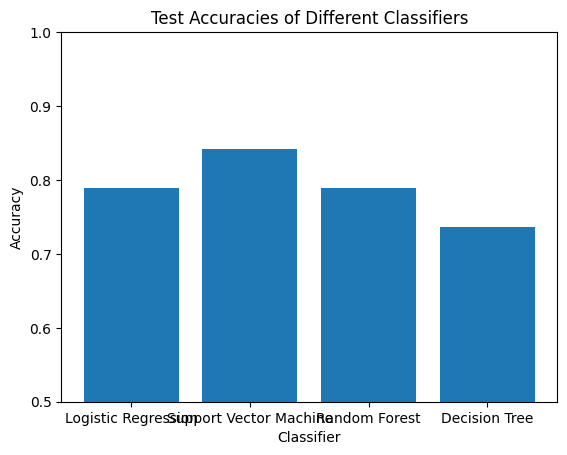

In [100]:
plt.bar(test_accuracies.keys(), test_accuracies.values())
plt.title('Test Accuracies of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim((0.5, 1.0))
plt.show()

In [101]:
rf2 = RandomForestClassifier(max_depth= 5, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 50)

In [102]:
rf2.fit(X_trainf,y_trainf)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50)

Text(0.5, 1.0, 'Feature Importance Ranking')

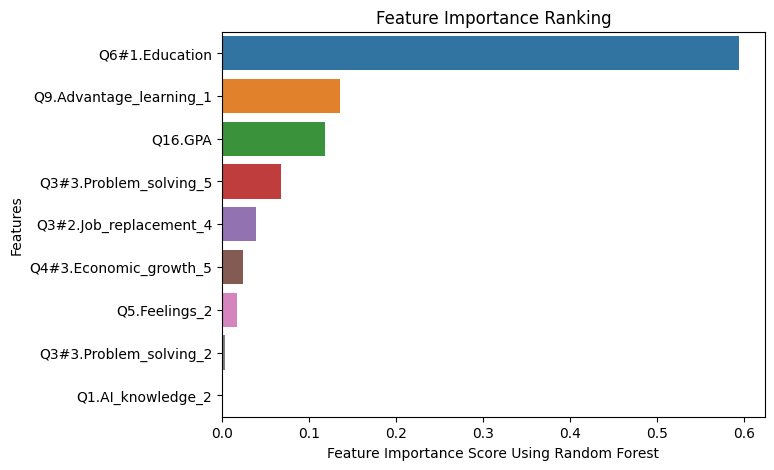

In [103]:
#Feature importance using random forest model
rf2.fit(X_trainf,y_trainf)
feature_names = feat_sel_col
plt.figure(figsize=(7,5))
feature_imp2 = pd.Series(rf2.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp2, y=feature_imp2.index)
plt.xlabel('Feature Importance Score Using Random Forest')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

In [104]:
rf2_y_pred = rf2.predict(X_testf)
rf2_y_pred.shape

(19,)

In [105]:
rf2.score(X_trainf, y_trainf)

0.95

Random forest classifier after hyperparameter tuning:
Accuracy Score: 0.84211
-------------------------------------------------------------------------------------------
Confusion Matrix:
[[ 2  1]
 [ 2 14]]
-------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.93      0.88      0.90        16

    accuracy                           0.84        19
   macro avg       0.72      0.77      0.74        19
weighted avg       0.86      0.84      0.85        19

-------------------------------------------------------------------------------------------


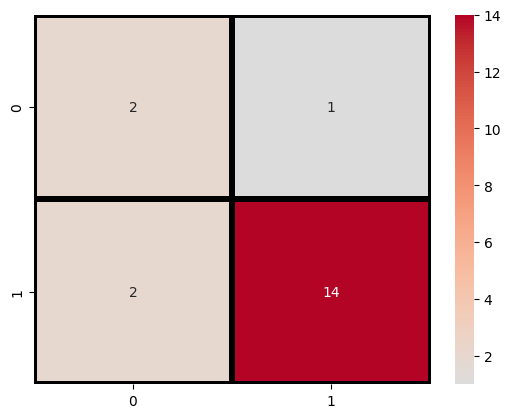

In [106]:
print('Random forest classifier after hyperparameter tuning:')
cm = confusion_matrix(y_testf, rf2_y_pred)
print('Accuracy Score:',np.round(accuracy_score(y_testf, rf2_y_pred),5))
print('-------------------------------------------------------------------------------------------')
print('Confusion Matrix:')
print(cm)
print('-------------------------------------------------------------------------------------------')
print(classification_report(y_testf, rf2_y_pred))
print('-------------------------------------------------------------------------------------------')
sns.heatmap(cm, center=True, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()

In [117]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

## Sequential Forward Floating Selection(sffs)
sffs = SFS(GradientBoostingRegressor(n_estimators=200, learning_rate = 0.25),
         k_features=(4),    
         forward=True,
         floating=True,
         cv=0)

sffs.fit(X_trainf, y_trainf)
selected_feat=sffs.k_feature_names_
selected_feat_indices = sffs.k_feature_idx_

# map feature indices to column names
# selected_feat_names = X_1.columns[selected_feat_indices].tolist()
print(selected_feat_indices)

(0, 4, 7, 8)


In [121]:
print(X_1.columns)

Index(['Q6#1.Education', 'Q1.AI_knowledge_2', 'Q3#3.Problem_solving_2',
       'Q3#3.Problem_solving_5', 'Q9.Advantage_learning_1',
       'Q4#3.Economic_growth_5', 'Q5.Feelings_2', 'Q16.GPA',
       'Q3#2.Job_replacement_4'],
      dtype='object')


In [127]:
# Considering only the highest importance feature
X_4=df_new[['Q6#1.Education','Q9.Advantage_learning_1','Q16.GPA','Q3#2.Job_replacement_4']]
X_trainf4, X_testf4, y_trainf4, y_testf4 = train_test_split(X_4, y, test_size=0.2, stratify=y,random_state=42)

In [128]:

sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_trainf4, y_trainf4= sm.fit_resample(X_trainf4, y_trainf4)
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_trainf4)

# transform the dataset using the fitted scaler
X_trainf4 = scaler.transform(X_trainf4)
X_testf4 = scaler.transform(X_testf4)

Random forest classifier after hyperparameter tuning:
Accuracy Score: 0.84211
-------------------------------------------------------------------------------------------
Confusion Matrix:
[[ 2  1]
 [ 2 14]]
-------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.93      0.88      0.90        16

    accuracy                           0.84        19
   macro avg       0.72      0.77      0.74        19
weighted avg       0.86      0.84      0.85        19

-------------------------------------------------------------------------------------------


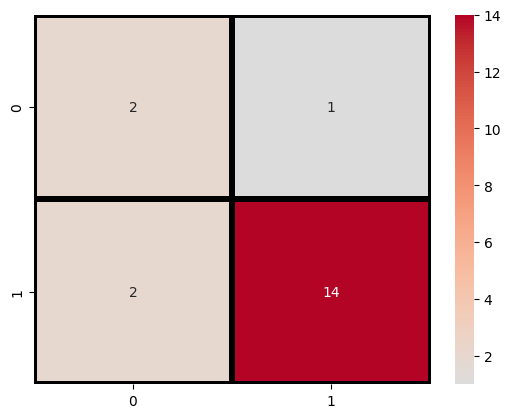

In [129]:
rf2.fit(X_trainf4,y_trainf4)
rf2_y_pred4 = rf2.predict(X_testf4)
print('Random forest classifier after hyperparameter tuning:')
cm = confusion_matrix(y_testf4, rf2_y_pred4)
print('Accuracy Score:',np.round(accuracy_score(y_testf4, rf2_y_pred4),5))
print('-------------------------------------------------------------------------------------------')
print('Confusion Matrix:')
print(cm)
print('-------------------------------------------------------------------------------------------')
print(classification_report(y_testf4, rf2_y_pred4))
print('-------------------------------------------------------------------------------------------')
sns.heatmap(cm, center=True, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()

In [130]:
# Considering only the highest importance feature
X_2=df_new[["Q6#1.Education"]]
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_2, y, test_size=0.2, stratify=y,random_state=42)


In [131]:
X_trainf=X_trainf.to_numpy().reshape(-1,1)
y_trainf=y_trainf.to_numpy().reshape(-1,1)


In [132]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_trainf, y_trainf= sm.fit_resample(X_trainf, y_trainf)
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_trainf)

# transform the dataset using the fitted scaler
X_trainf = scaler.transform(X_trainf)
X_testf = scaler.transform(X_testf)

Random forest classifier after hyperparameter tuning:
Accuracy Score: 0.73684
-------------------------------------------------------------------------------------------
Confusion Matrix:
[[ 2  1]
 [ 4 12]]
-------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.92      0.75      0.83        16

    accuracy                           0.74        19
   macro avg       0.63      0.71      0.64        19
weighted avg       0.83      0.74      0.77        19

-------------------------------------------------------------------------------------------


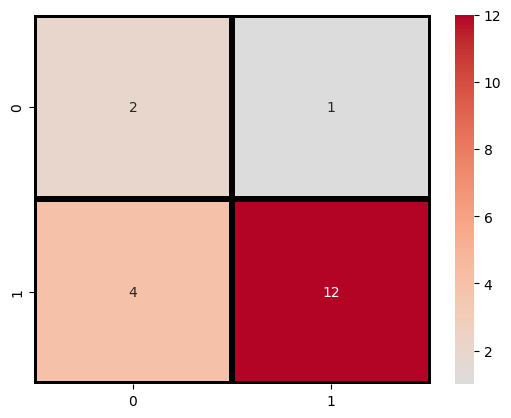

In [133]:
rf2.fit(X_trainf,y_trainf)
rf2_y_pred = rf2.predict(X_testf)
print('Random forest classifier after hyperparameter tuning:')
cm = confusion_matrix(y_testf, rf2_y_pred)
print('Accuracy Score:',np.round(accuracy_score(y_testf, rf2_y_pred),5))
print('-------------------------------------------------------------------------------------------')
print('Confusion Matrix:')
print(cm)
print('-------------------------------------------------------------------------------------------')
print(classification_report(y_testf, rf2_y_pred))
print('-------------------------------------------------------------------------------------------')
sns.heatmap(cm, center=True, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()

In [134]:
X_3=df_new[["Q6#1.Education","Q16.GPA"]]
X_trainf3, X_testf3, y_trainf3, y_testf3 = train_test_split(X_3, y, test_size=0.2, stratify=y,random_state=42)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_trainf3, y_trainf3= sm.fit_resample(X_trainf3, y_trainf3)
#Scaling the data 

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the dataset
scaler.fit(X_trainf3)

# transform the dataset using the fitted scaler
X_trainf3 = scaler.transform(X_trainf3)
X_testf3 = scaler.transform(X_testf3)

Random forest classifier after hyperparameter tuning:
Accuracy Score: 0.73684
-------------------------------------------------------------------------------------------
Confusion Matrix:
[[ 2  1]
 [ 4 12]]
-------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.92      0.75      0.83        16

    accuracy                           0.74        19
   macro avg       0.63      0.71      0.64        19
weighted avg       0.83      0.74      0.77        19

-------------------------------------------------------------------------------------------


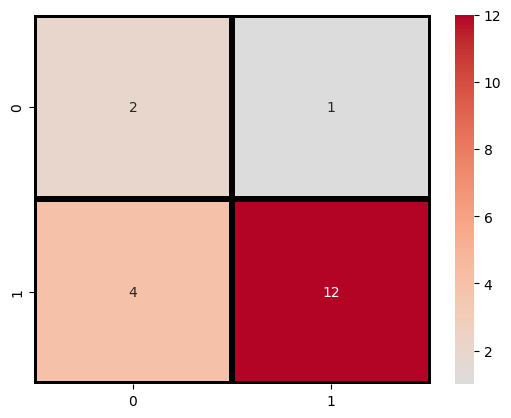

In [135]:
rf2.fit(X_trainf3,y_trainf3)
rf2_y_pred3 = rf2.predict(X_testf3)
print('Random forest classifier after hyperparameter tuning:')
cm = confusion_matrix(y_testf3, rf2_y_pred3)
print('Accuracy Score:',np.round(accuracy_score(y_testf3, rf2_y_pred3),5))
print('-------------------------------------------------------------------------------------------')
print('Confusion Matrix:')
print(cm)
print('-------------------------------------------------------------------------------------------')
print(classification_report(y_testf3, rf2_y_pred3))
print('-------------------------------------------------------------------------------------------')
sns.heatmap(cm, center=True, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()